<a href="https://colab.research.google.com/github/Tobifads/Social-and-web-analytics-cwii/blob/main/Social_Media_sentimental_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install praw

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 kB 3.1 MB/s eta 0:00:00


In [ ]:
import praw
import pandas as pd
import datetime
import nltk
import textblob
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from transformers import pipeline
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from transformers import pipeline
import spacy

In [ ]:
!pip3 install praw #installing PRAW

import praw #importing the library

#signing into api
reddit = praw.Reddit(
    client_id="nsD053qySiOHw3TemxBgAg",
    client_secret="nfrL6l3BwFAwC5pLOM4iEhu73WnnVg",
    user_agent="uberdrivers",
)

In [ ]:
#accesing sub reddit
subreddit = reddit.subreddit("uberdrivers")

In [ ]:
# Collecting recent posts (up to 1000)
recent_posts = subreddit.new(limit=1000)
posts_data = []

for post in recent_posts:
    # Get author name or "[deleted]" if unavailable
    author_name = post.author.name if post.author else "[deleted]"

    # Store post data in a dictionary
    posts_data.append({
        "id": post.id,
        "title": post.title,
        "selftext": post.selftext,
        "author": author_name,
        "score": post.score,
        "created_utc": post.created_utc,
        "num_comments": post.num_comments,
    })

# Create DataFrame from collected post data
posts_df = pd.DataFrame(posts_data)

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

In [ ]:
#collecting hot posts
hot_posts = subreddit.hot(limit=1000)
hot_posts_data = []
for post in hot_posts:
    hot_posts_data.append({
        "id": post.id,
        "title": post.title,
        "selftext": post.selftext,
        "author": author_name,  # Note: Using author_name from previous loop
        "score": post.score,
        "created_utc": post.created_utc,
        "num_comments": post.num_comments,
    })
hot_posts_df = pd.DataFrame(hot_posts_data)

# Combinining recent and hot posts, removing duplicates
all_posts_df = pd.concat([posts_df, hot_posts_df]).drop_duplicates(subset='id')

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

In [ ]:
all_posts_df

,id,title,selftext,author,score,created_utc,num_comments
0,1kbcmsg,Is UBER giving fair pricing to riders and driv...,,Ok_Cartoonist6749,2,1.746007e+09,1
1,1kbc343,"Even with all the new drivers, passengers must...",Either we have a massive problem with drivers ...,JDS-JustDude,4,1.746004e+09,2
2,1kbb85f,How many miles do you guys drive in a year?,Just curious how many miles everyone drives,Objective_Smoke_4750,2,1.746001e+09,6
3,1kbamqs,Background check,"For those of you specifically in Charlotte, No...",dances_with_karma,1,1.745998e+09,0
4,1kba92t,UBER is trying to convince drivers they only t...,"UBER can say they take 30% all they want, but ...",BeachOk6131,0,1.745996e+09,3
...,...,...,...,...,...,...,...
555,1k5wngp,"Just noticed we also pay for ""Customer promoti...",Is it just me or do you catch yourself wonderi...,masads5707,0,1.745407e+09,2
556,1k5wnfk,"Just noticed we also pay for ""Customer promoti...",Is it just me or do you catch yourself wonderi...,masads5707,0,1.745407e+09,1
557,1k5wnev,"Just noticed we also pay for ""Customer promoti...",Is it just me or do you catch yourself wonderi...,masads5707,0,1.745407e+09,1
558,1k5wne5,"Just noticed we also pay for ""Customer promoti...",Is it just me or do you catch yourself wonderi...,masads5707,0,1.745407e+09,1


In [ ]:
#iterating through post to collect comment
comments_data = []
for post_id in all_posts_df['id']:
    post = reddit.submission(id=post_id)
    post.comments.replace_more(limit=None)
    for comment in post.comments.list():
        author_name = comment.author.name if comment.author else "[deleted]"
        comments_data.append({
            "id": comment.id,
            "body": comment.body,
            "author": author_name,
            "score": comment.score,
            "created_utc": comment.created_utc,
            "parent_id": comment.parent_id,
            "post_id": post_id
        })

comments_df = pd.DataFrame(comments_data)

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

TooManyRequests: received 429 HTTP response

In [ ]:
all_posts_df = pd.read_csv('/content/uberdrivers_posts.csv')
comments_df = pd.read_csv('/content/uberdrivers_comments.csv')

In [ ]:
all_posts_df

,id,title,selftext,author,score,created_utc,num_comments
0,1k6ri58,Simple Question About Hertz,Do they allow you to rent with my only a debit...,SpringTop8166,3,1.745499e+09,2
1,1k6rfgq,Another pieces of shit,NaN,Anxious_Cup_3939,1,1.745499e+09,2
2,1k6l2y3,Matching to trips observation,Recently I've noticed that if I get a request ...,pakirby123,1,1.745475e+09,0
3,1k6l3mm,Its becoming a joke,The algorithm is so corrupt it knows how to ma...,left-hand357,2,1.745475e+09,0
4,1k6qpd5,Find a real job or start to look for a real job !,NaN,Admirable-Pace4568,5,1.745497e+09,6
...,...,...,...,...,...,...,...
992,1k5wngp,"Just noticed we also pay for ""Customer promoti...",Is it just me or do you catch yourself wonderi...,--R0N--,0,1.745407e+09,2
993,1k5wnfk,"Just noticed we also pay for ""Customer promoti...",Is it just me or do you catch yourself wonderi...,--R0N--,0,1.745407e+09,1
994,1k5wnev,"Just noticed we also pay for ""Customer promoti...",Is it just me or do you catch yourself wonderi...,--R0N--,0,1.745407e+09,1
995,1k5wne5,"Just noticed we also pay for ""Customer promoti...",Is it just me or do you catch yourself wonderi...,--R0N--,0,1.745407e+09,1


In [ ]:
all_posts_df

,id,title,selftext,author,score,created_utc,num_comments
0,1k6ri58,Simple Question About Hertz,Do they allow you to rent with my only a debit...,SpringTop8166,3,1.745499e+09,2
1,1k6rfgq,Another pieces of shit,NaN,Anxious_Cup_3939,1,1.745499e+09,2
2,1k6l2y3,Matching to trips observation,Recently I've noticed that if I get a request ...,pakirby123,1,1.745475e+09,0
3,1k6l3mm,Its becoming a joke,The algorithm is so corrupt it knows how to ma...,left-hand357,2,1.745475e+09,0
4,1k6qpd5,Find a real job or start to look for a real job !,NaN,Admirable-Pace4568,5,1.745497e+09,6
...,...,...,...,...,...,...,...
992,1k5wngp,"Just noticed we also pay for ""Customer promoti...",Is it just me or do you catch yourself wonderi...,--R0N--,0,1.745407e+09,2
993,1k5wnfk,"Just noticed we also pay for ""Customer promoti...",Is it just me or do you catch yourself wonderi...,--R0N--,0,1.745407e+09,1
994,1k5wnev,"Just noticed we also pay for ""Customer promoti...",Is it just me or do you catch yourself wonderi...,--R0N--,0,1.745407e+09,1
995,1k5wne5,"Just noticed we also pay for ""Customer promoti...",Is it just me or do you catch yourself wonderi...,--R0N--,0,1.745407e+09,1


In [ ]:
all_posts_df.describe()

,score,created_utc,num_comments
count,997.000000,9.970000e+02,997.000000
mean,16.417252,1.744924e+09,19.153460
std,84.128263,8.989981e+05,37.120388
min,0.000000,1.718591e+09,0.000000
25%,0.000000,1.744667e+09,2.000000
50%,2.000000,1.744935e+09,6.000000
75%,7.000000,1.745251e+09,19.000000
max,1593.000000,1.745502e+09,407.000000


In [ ]:
all_posts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997 entries, 0 to 996
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            997 non-null    object 
 1   title         997 non-null    object 
 2   selftext      836 non-null    object 
 3   author        997 non-null    object 
 4   score         997 non-null    int64  
 5   created_utc   997 non-null    float64
 6   num_comments  997 non-null    int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 54.7+ KB


In [ ]:
all_posts_df.dropna(inplace=True)

In [ ]:
all_posts_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 836 entries, 0 to 996
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            836 non-null    object 
 1   title         836 non-null    object 
 2   selftext      836 non-null    object 
 3   author        836 non-null    object 
 4   score         836 non-null    int64  
 5   created_utc   836 non-null    float64
 6   num_comments  836 non-null    int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 52.2+ KB


<Axes: title={'center': 'no. post posted by the top 15 authors'}, xlabel='author', ylabel='post'>

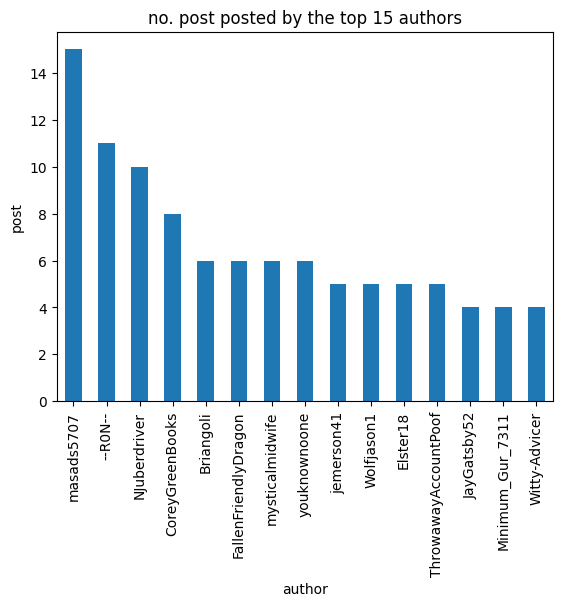

In [ ]:
all_posts_df.groupby(all_posts_df["author"]).size().sort_values(ascending=False).iloc[0:15].plot(kind="bar", ylabel="post",
      title="no. post posted by the top 15 authors")

<Axes: xlabel='date'>

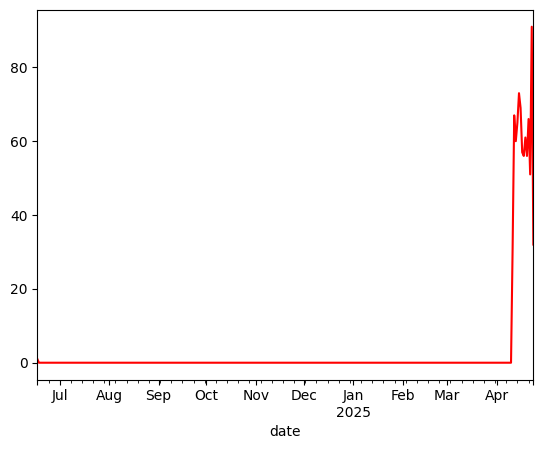

In [ ]:
all_posts_df['date'] = pd.to_datetime(all_posts_df['created_utc'], unit='s')
all_posts_df['created_utc'] = pd.to_datetime(all_posts_df['created_utc'], unit='s')
posts_per_day = all_posts_df.resample('D', on='date').size()
posts_per_day.plot(kind='line', color='red')


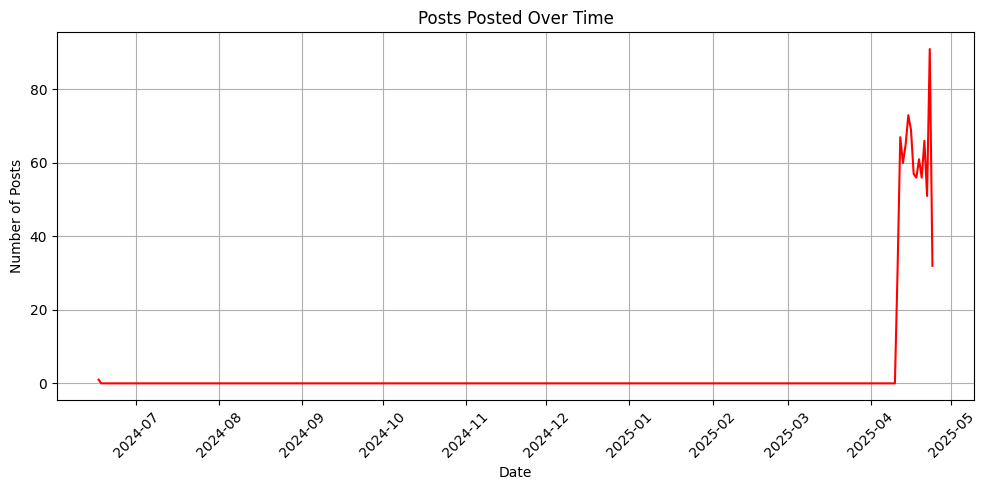

In [ ]:
# Set the datetime as index
all_posts_df.set_index('date', inplace=True)

# Resample to daily counts
daily_counts = all_posts_df.resample('D').size()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(daily_counts.index, daily_counts.values, color='red')
plt.title("Posts Posted Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Posts")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


In [ ]:
# Filter and count posts before 2025
posts_before_2025 = all_posts_df[all_posts_df['created_utc'] < '2025-01-01']
num_posts_before_2025 = len(posts_before_2025)

print(f"Number of posts before 2025: {num_posts_before_2025}")


Number of posts before 2025: 1


In [ ]:
# Identifying and counting duplicate posts based on 'selftext'
num_duplicate_posts = all_posts_df['selftext'].duplicated(keep=False).sum()

# Print the result
print(f"Number of duplicate posts: {num_duplicate_posts}")

Number of duplicate posts: 14


In [ ]:
all_posts_df = all_posts_df.drop_duplicates(subset=['selftext'], keep='first').reset_index(drop=True)


In [ ]:
# Identifying and counting duplicate posts based on 'selftext'
num_duplicate_posts = all_posts_df['selftext'].duplicated(keep=False).sum()

# Print the result
print(f"Number of duplicate posts: {num_duplicate_posts}")

Number of duplicate posts: 0


In [ ]:
all_posts_df = all_posts_df[all_posts_df['created_utc'] >= '2025-01-01']

In [ ]:
# Filter and count posts before 2025
posts_before_2025 = all_posts_df[all_posts_df['created_utc'] < '2025-01-01']
num_posts_before_2025 = len(posts_before_2025)

print(f"Number of posts before 2025: {num_posts_before_2025}")

Number of posts before 2025: 0


In [ ]:
all_posts_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 825 entries, 0 to 825
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            825 non-null    object        
 1   title         825 non-null    object        
 2   selftext      825 non-null    object        
 3   author        825 non-null    object        
 4   score         825 non-null    int64         
 5   created_utc   825 non-null    datetime64[ns]
 6   num_comments  825 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 51.6+ KB


In [ ]:
all_posts_df.describe()

,score,created_utc,num_comments
count,825.000000,825,825.000000
mean,17.380606,2025-04-18 01:10:16.976969728,19.635152
min,0.000000,2025-04-11 06:10:15,0.000000
25%,0.000000,2025-04-14 20:08:11,2.000000
50%,1.000000,2025-04-17 21:17:16,6.000000
75%,6.000000,2025-04-21 08:43:07,20.000000
max,1593.000000,2025-04-24 13:36:51,407.000000
std,91.163132,NaN,37.506620


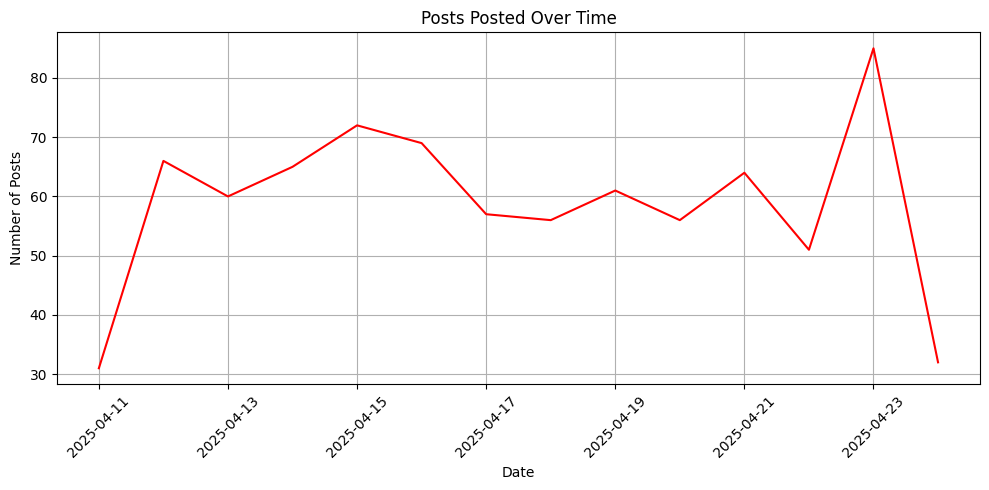

In [ ]:
# Set the datetime as index
all_posts_df['date'] = pd.to_datetime(all_posts_df['created_utc'], unit='s')
all_posts_df.set_index('date', inplace=True)

# Resample to daily counts
daily_counts = all_posts_df.resample('D').size()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(daily_counts.index, daily_counts.values, color='red')
plt.title("Posts Posted Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Posts")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


In [ ]:
comments_df

,id,body,author,score,created_utc,parent_id,post_id
0,mos6pb9,1. Renting is fine if it's you're full time an...,FinalSheepherder7533,1,1.745500e+09,t3_1k6ri58,1k6ri58
1,mos780x,Avis (and I think Hertz) allows debit cards......,BostonZamboni,1,1.745500e+09,t3_1k6ri58,1k6ri58
2,mos5e6h,No one does delivery around here because of th...,mapoftasmania,2,1.745500e+09,t3_1k6rfgq,1k6rfgq
3,mos623i,Really sick of this trash people. They are jus...,Anxious_Cup_3939,1,1.745500e+09,t1_mos5e6h,1k6rfgq
4,moryxq7,Uber's time is limited. When car companies ro...,crosstheroom,2,1.745497e+09,t3_1k6qpd5,1k6qpd5
...,...,...,...,...,...,...,...
18482,moo8pj3,"No, we don't.",--R0N--,1,1.745441e+09,t3_1k5wngp,1k5wngp
18483,moo979p,"No, we don't.",--R0N--,1,1.745441e+09,t3_1k5wnfk,1k5wnfk
18484,moo95sy,"No, we don't.",--R0N--,1,1.745441e+09,t3_1k5wnev,1k5wnev
18485,moo9415,"No, we don't.",--R0N--,1,1.745441e+09,t3_1k5wne5,1k5wne5


In [ ]:
comments_df.describe()

,score,created_utc
count,18487.000000,1.848700e+04
mean,2.634175,1.744899e+09
std,8.037141,9.022638e+05
min,-57.000000,1.718593e+09
25%,1.000000,1.744674e+09
50%,1.000000,1.744931e+09
75%,2.000000,1.745199e+09
max,391.000000,1.745501e+09


In [ ]:
comments_df.describe(include=object)

,id,body,author,parent_id,post_id
count,18487,18487,18487,18487,18487
unique,18487,18043,4598,8424,864
top,moo92sg,[deleted],masads5707,t3_1k1q3es,1k1q3es
freq,1,124,300,175,391


In [ ]:
comments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18487 entries, 0 to 18486
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           18487 non-null  object 
 1   body         18487 non-null  object 
 2   author       18487 non-null  object 
 3   score        18487 non-null  int64  
 4   created_utc  18487 non-null  float64
 5   parent_id    18487 non-null  object 
 6   post_id      18487 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 1011.1+ KB


In [ ]:
comments_df['created_utc']= pd.to_datetime(comments_df['created_utc'], unit='s')

In [ ]:
comments_df = comments_df.drop_duplicates(subset=['body']).reset_index(drop=True)


In [ ]:
comments_df

,id,body,author,score,created_utc,parent_id,post_id
0,mos6pb9,1. Renting is fine if it's you're full time an...,FinalSheepherder7533,1,2025-04-24 13:07:31,t3_1k6ri58,1k6ri58
1,mos780x,Avis (and I think Hertz) allows debit cards......,BostonZamboni,1,2025-04-24 13:10:26,t3_1k6ri58,1k6ri58
2,mos5e6h,No one does delivery around here because of th...,mapoftasmania,2,2025-04-24 12:59:53,t3_1k6rfgq,1k6rfgq
3,mos623i,Really sick of this trash people. They are jus...,Anxious_Cup_3939,1,2025-04-24 13:03:44,t1_mos5e6h,1k6rfgq
4,moryxq7,Uber's time is limited. When car companies ro...,crosstheroom,2,2025-04-24 12:20:48,t3_1k6qpd5,1k6qpd5
...,...,...,...,...,...,...,...
18038,l90n3qs,Give the hired uber/lyft shills/trolls a hard ...,Ok_Cryptographer7194,-1,2024-06-17 16:04:52,t1_l8zwe9a,1dhnmyb
18039,l931656,You're even dumber than I thought if you think...,Rubito93,1,2024-06-18 00:31:04,t1_l90n3qs,1dhnmyb
18040,l932gdz,Hush shill boy,Ok_Cryptographer7194,0,2024-06-18 00:39:45,t1_l931656,1dhnmyb
18041,moo8j6j,"No, we don't.",--R0N--,1,2025-04-23 20:39:06,t3_1k5wnh0,1k5wnh0


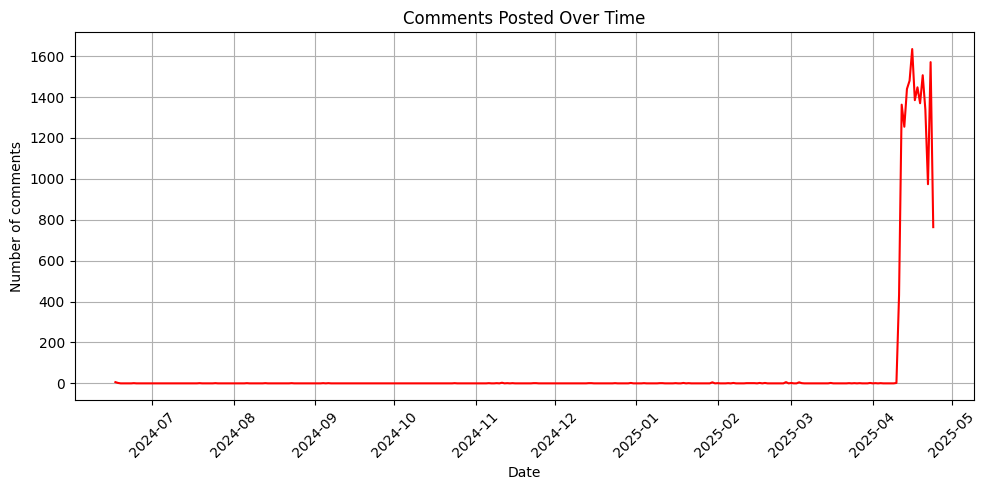

In [ ]:
# Set the datetime as index
comments_df['date'] = pd.to_datetime(comments_df['created_utc'], unit='s')
comments_df.set_index('date', inplace=True)

# Resample to daily counts
daily_counts = comments_df.resample('D').size()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(daily_counts.index, daily_counts.values, color='red')
plt.title("Comments Posted Over Time")
plt.xlabel("Date")
plt.ylabel("Number of comments")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


In [ ]:
# Filter and count posts before 2025
comments_before_2025 = comments_df[comments_df['created_utc'] < '2025-04-01']
num_comments_before_2025 = len(comments_before_2025)

print(f"Number of posts before 2025: {num_comments_before_2025}")

Number of posts before 2025: 76


In [ ]:
comments_df = comments_df[comments_df['created_utc'] >= '2025-04-01']

<ipython-input-193-f5ecacfae92a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comments_df['date'] = pd.to_datetime(comments_df['created_utc'], unit='s')


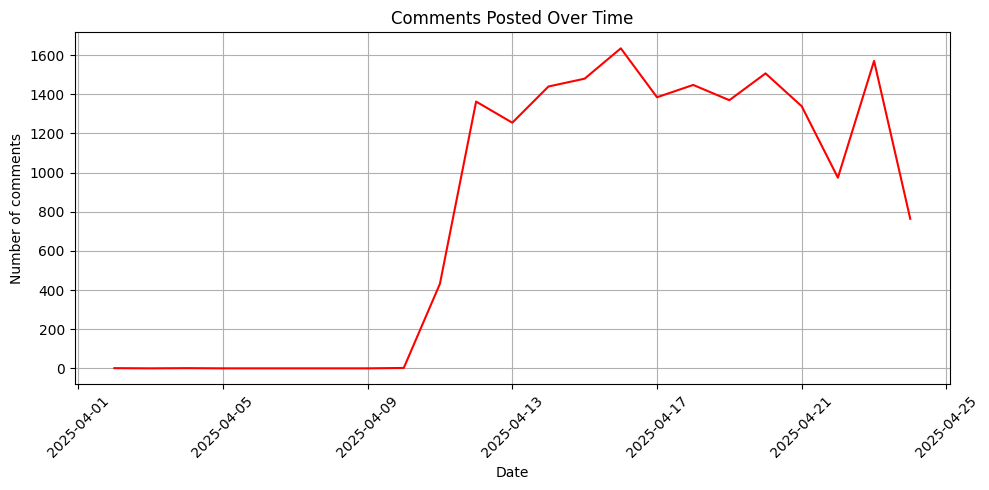

In [ ]:
# Set the datetime as index
comments_df['date'] = pd.to_datetime(comments_df['created_utc'], unit='s')
comments_df.set_index('date', inplace=True)

# Resample to daily counts
daily_counts = comments_df.resample('D').size()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(daily_counts.index, daily_counts.values, color='red')
plt.title("Comments Posted Over Time")
plt.xlabel("Date")
plt.ylabel("Number of comments")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


In [ ]:
import re
import string

def clean_text(text):
    if not isinstance(text, str):
        return ""  # Return empty string for non-string input

    # For removing URLs
    text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.IGNORECASE)

    # For removing mentions
    text = re.sub(r"@\w+", "", text)

    # For removing HTML tags
    text = re.sub(r"<.*?>", "", text)

    # For removing special characters and punctuation, leaving only word characters,
    # whitespace, and some common symbols
    text = re.sub(r"[^'\w\s]", '', text)
    text = text.replace('\n', ' ')

    # For removing extra whitespace
    text = re.sub(r"\s+", " ", text).strip()

    # For removing
    text = text.lower()

    # For handling contractions (simplified)
    text = re.sub(r"don't", "do not", text)
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"you're", "you are", text)
    text = re.sub(r"it's", "it is", text)
    text = re.sub(r"we're", "we are", text)
    text = re.sub(r"they're", "they are", text)
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"she's", "she is", text)
    text = re.sub(r"that's", "that is", text)
    text = re.sub(r"what's", "what is", text)
    text = re.sub(r"where's", "where is", text)
    text = re.sub(r"how's", "how is", text)
    text = re.sub(r"\'s", "", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'d", " would", text)
    return text

In [ ]:
#applying the fuction to our dataset
all_posts_df['cleaned_title'] = all_posts_df['title'].apply(clean_text)
all_posts_df['cleaned_selftext'] = all_posts_df['selftext'].apply(clean_text)
comments_df['cleaned_body'] = comments_df['body'].apply(clean_text)

<ipython-input-35-a908d736e5df>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comments_df['cleaned_body'] = comments_df['body'].apply(clean_text)


In [ ]:
!pip install nltk

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
custom_stop_words = [
    "uber", "driver", "passenger", "ride", "trip", "trips", "fare", "tip", "app", "lyft",
    "drive", "just", "like", "know", "get", "got", "one", "going", "now", "go", "see",
    "also", "even", "well", "really", "want", "think", "would", "could", "should", "much",
    "many", "back", "still", "never", "always", "way", "say", "said", "something", "time",
    "day", "people", "thing", "etc", "etc.", "…", "...", "”", "“", "’", "•", "●", "▪", "■",
    "nbsp", "drivers", "driving", "rides"
]
stop_words.update(custom_stop_words)


In [ ]:
def remove_stopwords(text):
    """Removes stop words from the input text."""
    if not isinstance(text, str):
        return ""
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return " ".join(filtered_words)

all_posts_df['cleaned_title'] = all_posts_df['cleaned_title'].apply(remove_stopwords)
all_posts_df['cleaned_selftext'] = all_posts_df['cleaned_selftext'].apply(remove_stopwords)
comments_df['cleaned_body'] = comments_df['cleaned_body'].apply(remove_stopwords)

<ipython-input-46-e2fde578bf3d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comments_df['cleaned_body'] = comments_df['cleaned_body'].apply(remove_stopwords)


In [ ]:
all_posts_df

,id,title,selftext,author,score,created_utc,num_comments,cleaned_title,cleaned_selftext
date,,,,,,,,,
2025-04-24 12:55:33,1k6ri58,Simple Question About Hertz,Do they allow you to rent with my only a debit...,SpringTop8166,3,2025-04-24 12:55:33,2,simple question hertz,allow rent debit card cc secure put money reme...
2025-04-24 06:02:05,1k6l2y3,Matching to trips observation,Recently I've noticed that if I get a request ...,pakirby123,1,2025-04-24 06:02:05,0,matching observation,recently noticed request goes queue stop light...
2025-04-24 06:03:14,1k6l3mm,Its becoming a joke,The algorithm is so corrupt it knows how to ma...,left-hand357,2,2025-04-24 06:03:14,0,becoming joke,algorithm corrupt knows make worth getting pai...
2025-04-24 12:13:51,1k6qo14,Wrong background check,I got a notice the other day that my driving p...,MidnightAcceptable44,4,2025-04-24 12:13:51,1,wrong background check,notice privileges suspended background check t...
2025-04-24 11:39:32,1k6q1dm,New opportunities,What are some other recommendations of freelan...,Wingss013,2,2025-04-24 11:39:32,1,new opportunities,recommendations freelance jobs flexible uberly...
...,...,...,...,...,...,...,...,...,...
2025-04-11 06:10:15,1jwj32n,Did I pay the correct amount?,"Hey Guys, so I’m from Hawaii I paid roughly 10...",More_Permission_4347,1,2025-04-11 06:10:15,10,pay correct amount,hey guys im hawaii paid roughly 10k federal es...
2025-04-24 13:36:51,1k6segm,i got to quit uber!!!!,i was driving uber and lyft and got another jo...,--R0N--,4,2025-04-24 13:36:51,0,quit,another job hated customers treat u shit lower...
2025-04-24 13:16:25,1k6ry6e,Can you be a helper?,Guys I am doing my university graduation proje...,--R0N--,2,2025-04-24 13:16:25,3,helper,guys university graduation project need interv...


In [ ]:
from collections import Counter

word_counter = Counter()
for row in all_posts_df.to_dict("records"): #converts_to_dictionary
  word_counter.update(row["cleaned_selftext"].split()) #tokenization
df_tf = pd.DataFrame(word_counter.most_common(10))
df_tf.columns = ["term", "frequency"]
df_tf

,term,frequency
0,not,366
1,I,322
2,car,241
3,take,240
4,do,236
5,m,222
6,pay,216
7,make,210
8,try,149
9,tell,148


In [ ]:
print(comments_df['cleaned_body'].apply(type).unique())

[<class 'str'> <class 'float'>]


In [ ]:
comments_df = comments_df[comments_df['cleaned_body'].apply(lambda x: isinstance(x, str))]

In [ ]:
from collections import Counter

word_counter = Counter()
for row in comments_df.to_dict("records"): #converts_to_dictionary
  word_counter.update(row["cleaned_body"].split()) #tokenization
df_tfc = pd.DataFrame(word_counter.most_common(10))
df_tfc.columns = ["term", "frequency"]
df_tfc

,term,frequency
0,not,3470
1,do,2357
2,make,2338
3,take,2034
4,pay,1931
5,car,1829
6,I,1722
7,work,1209
8,s,1195
9,m,1181


In [ ]:
#lemmatization
import spacy

nlp = spacy.load("en_core_web_sm")
def lemmatize_text(text):
    """Lemmatizes the input text using spaCy."""
    if not isinstance(text, str):
        return ""
    doc = nlp(text)
    lemmatized_words = [token.lemma_ for token in doc]
    return " ".join(lemmatized_words)

In [ ]:
all_posts_df['cleaned_title'] = all_posts_df['cleaned_title'].apply(lemmatize_text)
all_posts_df['cleaned_selftext'] = all_posts_df['cleaned_selftext'].apply(lemmatize_text)
comments_df['cleaned_body'] = comments_df['cleaned_body'].apply(lemmatize_text)

<ipython-input-51-40bd4e3eba55>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comments_df['cleaned_body'] = comments_df['cleaned_body'].apply(lemmatize_text)


In [ ]:
pd.set_option("display.max_colwidth", None)

all_posts_df[['selftext', 'cleaned_selftext']].head()

,selftext,cleaned_selftext
0,"Do they allow you to rent with my only a debit card? I DO have a CC but it's secure (I put money on it) and I think I remember them saying they don't take ""prepaid cards"". \n\nIf they don't let you rent with a debit card, is there anyone that does? Getaround closed in the US.\n\n*For those who will inevitably comment on how bad renting is, I'm in that one situation where it's my only option and the best option for me.",allow rent debit card cc secure put money remember say take prepaid card let rent debit card anyone getaround close we inevitably comment bad renting situation option good option
1,"Recently I've noticed that if I get a request while driving it goes into a queue but if you stop at a light or stop sign it drops you from the queue and ""All requests are taken please try again later"". Anyone else experience this?",recently notice request go queue stop light stop sign drop queue request take please try later anyone else experience
2,The algorithm is so corrupt it knows how to make it not worth it for drivers. Drivers shouldn't be getting paid less than $1 a mile. It's pretty pathetic that Uber thinks that we are stupid. The moment you make a turn away from a direction you are heading it wants you to loop back in the same direction you were going. There is no way that person just put in a ride. It's all set up for us to drive the maximum amount of miles for minimalist amount of money. And then the misc adjustments? Cmon now if someone paid a price it should be the price. Especially with the tips. They are truly doing what doordash sissy got caught for. But trying to hide it. It's time all of the drivers take a stand to all of this. I say everyone should plan to take the same week off. Yes a week. And disrupt the system. And yes I know some will say they can't afford it but guess what neither is working your ass off to make 20-25 an hour for only to put half back in your gas tank. Pay for maintenance etc. If customers are willing to pay $20 for a 5 or less miles. We should be able to get more than half that. The system doesn't need more than a quarter of that. If that. The system should link drivers with passengers. Not take the customers money and see how little we would do the ride for. And truly its the ones fault that accept those ride. We should be be getting paid less than $10 a ride no matter what. So again I say distrupt the system. Let people struggle to get ride because Uber can't pay its drivers properly. Then let Uber struggle to make anything because we aren't going to accept shyt rides. I fray wanna know who accepts the rides that make you ride out 10 miles to someone who wants a 2 mile ride for $3.19? Feel free to speak up on here,algorithm corrupt know make worth getting pay less 1 mile pretty pathetic think stupid moment make turn away direction heading want loop direction person put set we maximum amount mile minimalist amount money misc adjustment cmon someone pay price price especially tip truly doordash sissy catch try hide take stand everyone plan take week yes week disrupt system yes afford guess neither work ass make 2025 hour put half gas tank pay maintenance customer willing pay 20 5 less mile able half system need quarter system link passenger take customer money little truly one fault accept getting pay less 10 matter distrupt system let struggle pay properly let struggle make anything accept shyt fray wanna accept make 10 mile someone want 2 mile 319 feel free speak
3,"I got a notice the other day that my driving privileges have been suspended because of a background check. I have been driving for Uber for over three years and for some reason they did a background check on a license. I had five years ago it had surrendered in a different state. Even though Uber has all of my correct information, they base their decision on a third-party solution called sambasafety.com. I now cannot drive until somebody safety uses the correct information which I have provid

In [ ]:
comments_df[['body', 'cleaned_body']].head()

,body,cleaned_body
0,"1. Renting is fine if it's you're full time and your market supports it. (If your market can't support it, you can disregard the rest of this)\n2. Hertz will accept an actual debit card (tied to an actuall checking account.) Some markets will not even require a deposit.\n3. Depending on your market I reccomend the getting a GMC Acadia or the like, I promise you while folks say they dont care what you drive. A nicer large vehicle will absolutely increase your tips exponetially.\n4. This is your business. You will be able to write of the cost of the rental, gas car washes etc....\n5. Good luck out there.",1 rent fine full market support market support disregard rest 2 hertz accept actual debit card tie actuall check account market require deposit 3 depend market reccomend get gmc acadia promise folk do not care nicer large vehicle absolutely increase tip exponetially 4 business able write cost rental gas car wash 5 good luck
1,"Avis (and I think Hertz) allows debit cards...but they do a credit check. \n\nI think the credit check is not too difficult, as I think I had a 500 or 550 credit score a few years ago and I was still able to use the debit card at Avis for Uber. It might be different now?\n\nZipcar, if in your city, allows a debit card. I am currently driving a daily Zipcar, no weeklies.\n\nBuggy, a weekly rental, can't go out of state as it will fine you $100, if in your city, allows debit cards.\n\nI used a secured credit card at Avis last May for Uber. Not a card from a Walmart or CVS, but my name on it from TD Bank. And I just qualified for one at Citicard. Bank of America and First Premier and Discover have secured credut cards. Capital One also and I think US Bank. \n\nNot all who apply are approved.",avis hertz allow debit cardsbut credit check credit check difficult 500 550 credit score year ago able use debit card avis might different zipcar city allow debit card currently daily zipcar weekly buggy weekly rental state fine 100 city allow debit card use secured credit card avis last may card walmart cvs name td bank qualified citicard bank america first premier discover secure credut card capital us bank apply approve
2,"No one does delivery around here because of that. So much so that I had a guy order a regular uber and then just tell me to take his package to the destination, but he wouldn't be riding with it. All good with me. Packages should never have been cheaper than passengers in the first place. The cost to drivers is the same.",delivery around guy order regular tell take package destination ride good package cheap passenger first place cost
3,Really sick of this trash people. They are just playing with people and uber allows it.,sick trash playing allow
4,Uber's time is limited. When car companies roll out their own robotaxis they can cut Uber out all together.\n\nand if they can't make a profit with free cars and free gas and free drivers who are paid less than half of what the customer pays how are they going to make money paying for these cars who can only move people as fast as traffic allows.,limited car company roll robotaxis cut together make profit free car free gas free pay less half customer pay make money pay car move fast traffic allow
5,"We all know this. Uber is best done part time. Anyone doing this full time, which I have before, I pray for",well do part anyone full pray
6,"This is posted like every other day. Funny to watch Uber drivers trash themselves saying Uber drivers are losers and being a taxi driver isn't a ""real job"". \nBizarre.",post every funny watch trash saying loser taxi real job bizarre
7,Ppl who say this are A**h. No driver is happy with Uber but if we can get another job. We would,ppl ah happy another job
8,I'll believe it when it can do rides in the middle of a Minnesota blizzard when people still need to get to work,believe middle minnesota blizzard need work
9,How long have you been driving ?,long


In [ ]:
pd.reset_option("display.max_colwidth")

In [ ]:
all_posts_df.to_csv('uberdrivers_posts_30.csv', index=False)
comments_df.to_csv('uberdrivers_comments_30.csv', index=False)

In [ ]:
all_posts_df = pd.read_csv('/content/uberdrivers_posts_30.csv')
comments_df = pd.read_csv('/content/uberdrivers_comments_30.csv')

NameError: name 'pd' is not defined

In [ ]:
all_posts_df.dropna(subset=['cleaned_selftext'], inplace=True)

In [ ]:
all_posts_df['cleaned_selftext'] = all_posts_df['cleaned_selftext'].fillna('')

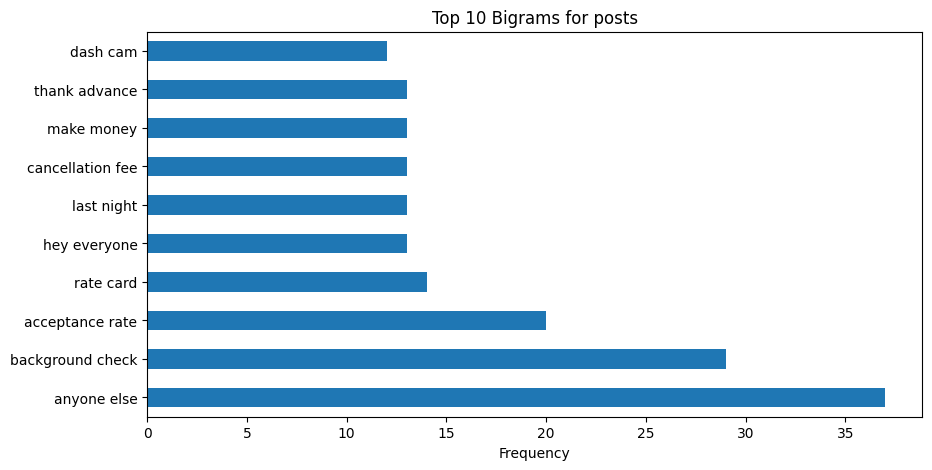

In [ ]:
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(all_posts_df['cleaned_selftext'])
bigrams = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Suming and getting most frequent bigrams
bigram_freq = bigrams.sum().sort_values(ascending=False).head(10)

# Plot
bigram_freq.plot(kind='barh', figsize=(10, 5), title='Top 10 Bigrams for posts')
plt.xlabel("Frequency")
plt.show()


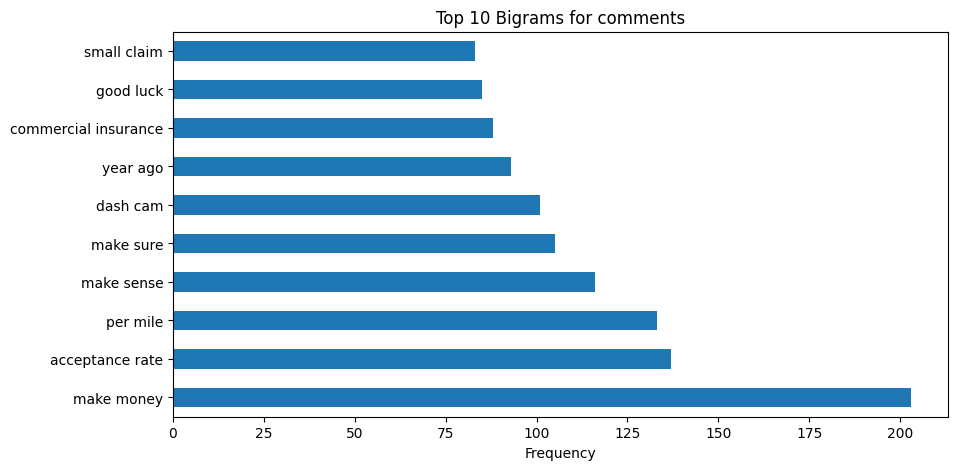

In [ ]:
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(comments_df['cleaned_body'])
bigrams = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Suming and getting most frequent bigrams
bigram_freq = bigrams.sum().sort_values(ascending=False).head(10)

# Plot
bigram_freq.plot(kind='barh', figsize=(10, 5), title='Top 10 Bigrams for comments')
plt.xlabel("Frequency")
plt.show()


In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd

# Create VADER sentiment analyzer
vader = SentimentIntensityAnalyzer()

def get_vader_sentiment(text):
    # Handle non-string input
    if not isinstance(text, str):
        return pd.Series([None, None, None, None])

    # Calculate sentiment scores
    scores = vader.polarity_scores(text)

    # Return scores as a pandas Series
    return pd.Series([scores['neg'], scores['neu'], scores['pos'], scores['compound']])

In [ ]:
# Applying to posts
all_posts_df[['vader_neg', 'vader_neu', 'vader_pos', 'vader_compound']] = all_posts_df['cleaned_selftext'].apply(get_vader_sentiment)

# Applying to comments
comments_df[['vader_neg', 'vader_neu', 'vader_pos', 'vader_compound']] = comments_df['cleaned_body'].apply(get_vader_sentiment)


In [ ]:
all_posts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                825 non-null    object 
 1   title             825 non-null    object 
 2   selftext          825 non-null    object 
 3   author            825 non-null    object 
 4   score             825 non-null    int64  
 5   created_utc       825 non-null    object 
 6   num_comments      825 non-null    int64  
 7   cleaned_title     804 non-null    object 
 8   cleaned_selftext  810 non-null    object 
 9   vader_neg         810 non-null    float64
 10  vader_neu         810 non-null    float64
 11  vader_pos         810 non-null    float64
 12  vader_compound    810 non-null    float64
dtypes: float64(4), int64(2), object(7)
memory usage: 83.9+ KB


<Axes: ylabel='Frequency'>

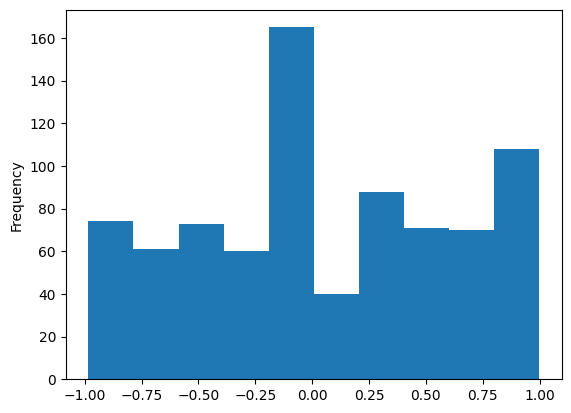

In [ ]:
all_posts_df["vader_compound"].plot(kind="hist")

<Axes: ylabel='Frequency'>

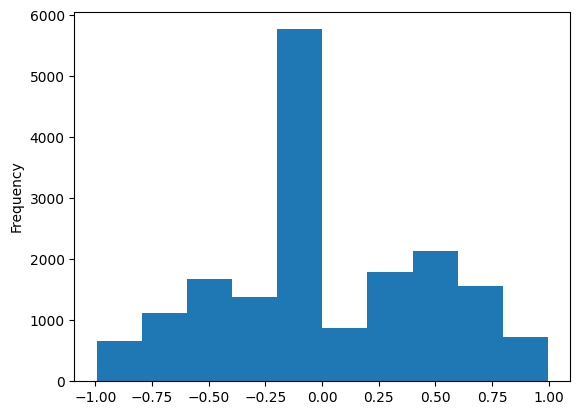

In [ ]:
comments_df["vader_compound"].plot(kind="hist")

In [ ]:
def classify_sentiment(compound):
    if pd.isna(compound):
        return "unknown"
    elif compound >= 0.05:
        return "positive"
    elif compound <= -0.05:
        return "negative"
    else:
        return "neutral"


In [ ]:
all_posts_df['vader_sentiment'] = all_posts_df['vader_compound'].apply(classify_sentiment)
comments_df['vader_sentiment'] = comments_df['vader_compound'].apply(classify_sentiment)


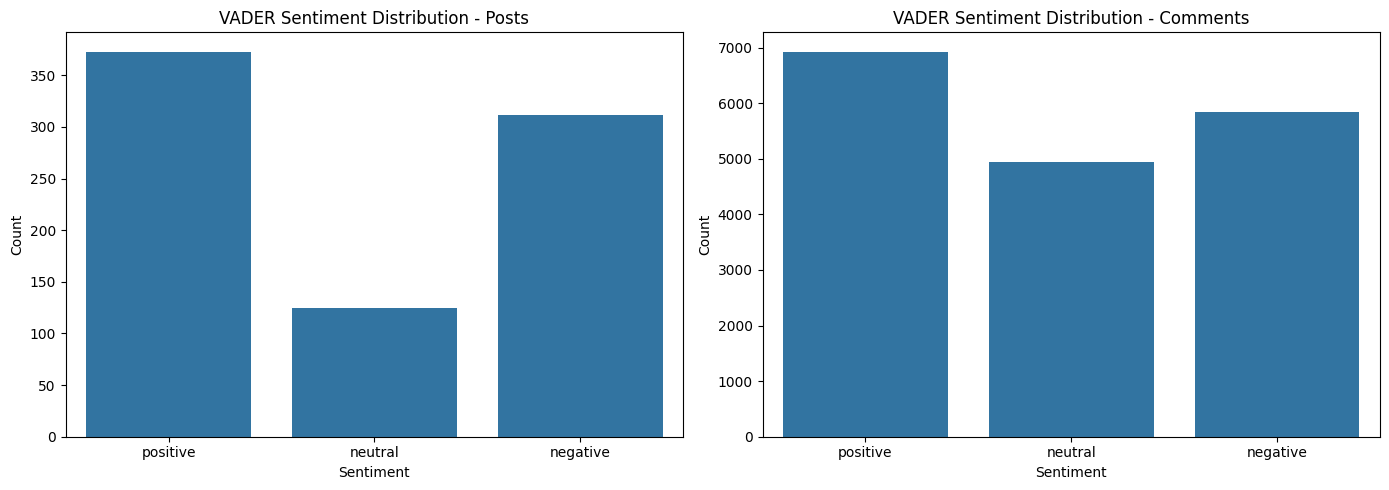

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot for posts
sns.countplot(x='vader_sentiment', data=all_posts_df, order=["positive", "neutral", "negative"], ax=axes[0])
axes[0].set_title('VADER Sentiment Distribution - Posts')
axes[0].set_xlabel('Sentiment')
axes[0].set_ylabel('Count')

# Plot for comments
sns.countplot(x='vader_sentiment', data=comments_df, order=["positive", "neutral", "negative"], ax=axes[1])
axes[1].set_title('VADER Sentiment Distribution - Comments')
axes[1].set_xlabel('Sentiment')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


In [ ]:
 !pip install --upgrade gensim


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 74.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 91.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 16.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.2
    Uninstalling scipy-1.15.2:
      Successfully uninstalled scipy-1.15.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [ ]:
# !pip install --force-reinstall gensim

In [ ]:
!pip install gensim
import gensim
import gensim.corpora as corpora

In [ ]:
# Prepare the texts (cleaned, drop empty, split into words)
texts = all_posts_df['cleaned_selftext'].dropna().apply(lambda x: x.split()).tolist()

# Create a gensim Dictionary (maps words to IDs)
dictionary = corpora.Dictionary(texts)

# Create a gensim Corpus (bag-of-words representation)
corpus = [dictionary.doc2bow(text) for text in texts]

In [ ]:
# Import necessary classes from gensim
from gensim.models import CoherenceModel, LdaModel

# Initializing an empty list to store coherence scores
coherence_scores = []

# Iterating through a range of topic numbers (from 2 to 10)
for num_topics in range(2, 11):
    # Train an LDA model with the specified number of topics
    lda = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42, passes=10)

    # Calculate the coherence score for the trained model
    coherence_model = CoherenceModel(model=lda, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence = coherence_model.get_coherence()

    # Append the topic number and coherence score to the list
    coherence_scores.append((num_topics, coherence))

    # Print the topic number and coherence score
    print(f'Num Topics: {num_topics} — Coherence Score: {coherence:.4f}')


Num Topics: 2 — Coherence Score: 0.2924
Num Topics: 3 — Coherence Score: 0.2586
Num Topics: 4 — Coherence Score: 0.2774
Num Topics: 5 — Coherence Score: 0.3039
Num Topics: 6 — Coherence Score: 0.3017
Num Topics: 7 — Coherence Score: 0.2669
Num Topics: 8 — Coherence Score: 0.2787
Num Topics: 9 — Coherence Score: 0.2836
Num Topics: 10 — Coherence Score: 0.2710


In [ ]:
optimal_k = 5  # Based on the optimal score
lda_model = LdaModel(corpus=corpus,
                     id2word=dictionary,
                     num_topics=optimal_k,
                     random_state=42,
                     passes=10,
                     per_word_topics=True)


In [ ]:
topics = lda_model.print_topics(num_words=10)
for idx, topic in topics:
    print(f"Topic {idx+1}: {topic}")

Topic 1: 0.019*"I" + 0.013*"m" + 0.008*"not" + 0.007*"car" + 0.007*"try" + 0.006*"make" + 0.006*"account" + 0.006*"ve" + 0.006*"work" + 0.006*"year"
Topic 2: 0.009*"not" + 0.008*"minute" + 0.007*"take" + 0.007*"rider" + 0.007*"wait" + 0.006*"car" + 0.005*"give" + 0.005*"I" + 0.005*"request" + 0.005*"anyone"
Topic 3: 0.010*"car" + 0.008*"take" + 0.007*"pay" + 0.007*"use" + 0.006*"make" + 0.004*"guy" + 0.004*"work" + 0.004*"account" + 0.003*"company" + 0.003*"try"
Topic 4: 0.011*"pay" + 0.011*"mile" + 0.011*"not" + 0.009*"hour" + 0.009*"take" + 0.006*"car" + 0.006*"I" + 0.006*"do" + 0.005*"bad" + 0.005*"m"
Topic 5: 0.020*"not" + 0.015*"do" + 0.009*"make" + 0.009*"take" + 0.008*"I" + 0.007*"car" + 0.006*"tell" + 0.006*"m" + 0.006*"pay" + 0.005*"get"


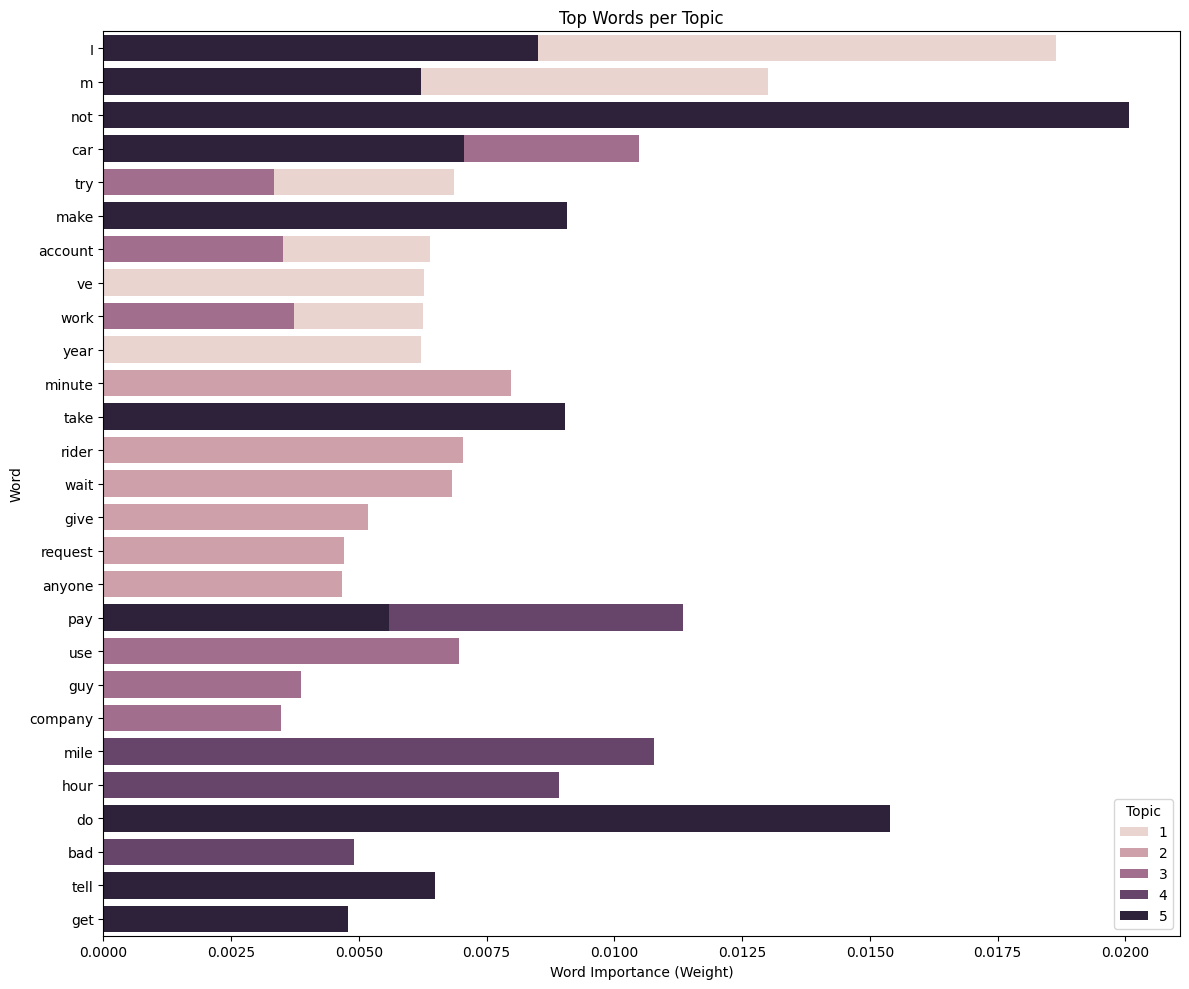

In [ ]:
num_topics = lda_model.num_topics

# Extracting top words for each topic
topn = 10
topic_words = []
for topic_id in range(num_topics):
    words = lda_model.show_topic(topic_id, topn=topn)
    for word, weight in words:
        topic_words.append((topic_id + 1, word, weight))

# Creating DataFrame for plotting
df_topics = pd.DataFrame(topic_words, columns=["Topic", "Word", "Weight"])

# Plot
plt.figure(figsize=(12, num_topics * 2))
sns.barplot(data=df_topics, x="Weight", y="Word", hue="Topic", dodge=False)
plt.title("Top Words per Topic")
plt.xlabel("Word Importance (Weight)")
plt.ylabel("Word")
plt.tight_layout()
plt.show()

In [ ]:
texts2 = comments_df['cleaned_body'].dropna().apply(lambda x: x.split()).tolist()
dictionary2 = corpora.Dictionary(texts2)
corpus2 = [dictionary2.doc2bow(text) for text in texts2]

In [ ]:
coherence_scores = []
for num_topics in range(2, 11):
    lda = LdaModel(corpus=corpus2, id2word=dictionary2, num_topics=num_topics, random_state=42, passes=10)
    coherence_model = CoherenceModel(model=lda, texts=texts2, dictionary=dictionary2, coherence='c_v')  # Use texts2 and dictionary2
    coherence = coherence_model.get_coherence()
    coherence_scores.append((num_topics, coherence))
    print(f'Num Topics: {num_topics} — Coherence Score: {coherence:.4f}')

Num Topics: 2 — Coherence Score: 0.7249
Num Topics: 3 — Coherence Score: 0.7041
Num Topics: 4 — Coherence Score: 0.6823
Num Topics: 5 — Coherence Score: 0.6030
Num Topics: 6 — Coherence Score: 0.5727
Num Topics: 7 — Coherence Score: 0.5329
Num Topics: 8 — Coherence Score: 0.5787
Num Topics: 9 — Coherence Score: 0.5405
Num Topics: 10 — Coherence Score: 0.5120


In [ ]:
optimal_k2 = 5  # Based on the optimal score
lda_model2 = LdaModel(corpus=corpus2,
                     id2word=dictionary2,
                     num_topics=optimal_k2,
                     random_state=42,
                     passes=10,
                     per_word_topics=True)

In [ ]:
topics2 = lda_model2.print_topics(num_words=10)
for idx, topic in topics:
    print(f"Topic {idx+1}: {topic}")

Topic 1: 0.019*"I" + 0.013*"m" + 0.008*"not" + 0.007*"car" + 0.007*"try" + 0.006*"make" + 0.006*"account" + 0.006*"ve" + 0.006*"work" + 0.006*"year"
Topic 2: 0.009*"not" + 0.008*"minute" + 0.007*"take" + 0.007*"rider" + 0.007*"wait" + 0.006*"car" + 0.005*"give" + 0.005*"I" + 0.005*"request" + 0.005*"anyone"
Topic 3: 0.010*"car" + 0.008*"take" + 0.007*"pay" + 0.007*"use" + 0.006*"make" + 0.004*"guy" + 0.004*"work" + 0.004*"account" + 0.003*"company" + 0.003*"try"
Topic 4: 0.011*"pay" + 0.011*"mile" + 0.011*"not" + 0.009*"hour" + 0.009*"take" + 0.006*"car" + 0.006*"I" + 0.006*"do" + 0.005*"bad" + 0.005*"m"
Topic 5: 0.020*"not" + 0.015*"do" + 0.009*"make" + 0.009*"take" + 0.008*"I" + 0.007*"car" + 0.006*"tell" + 0.006*"m" + 0.006*"pay" + 0.005*"get"


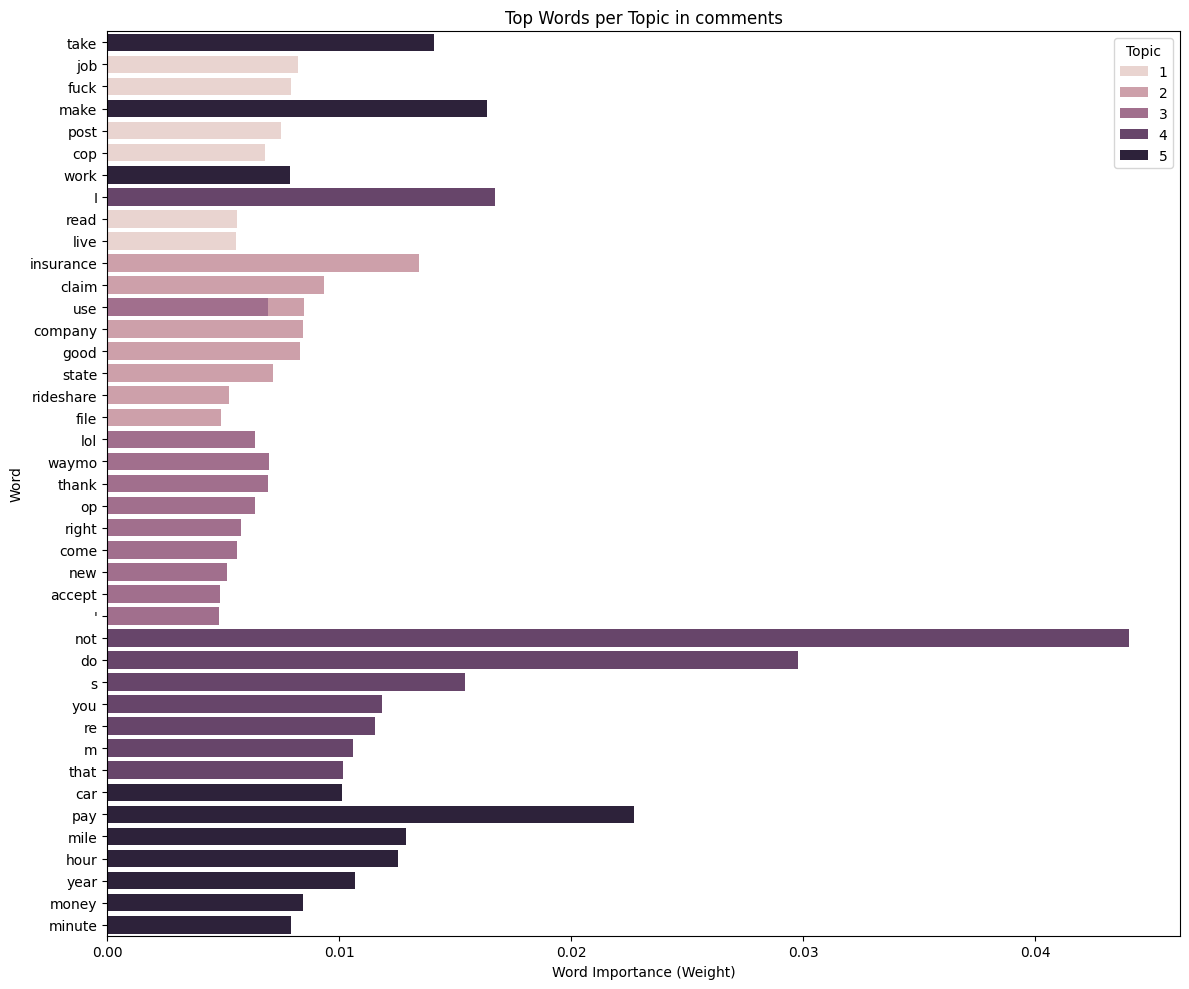

In [ ]:
num_topics = lda_model2.num_topics  # to get the actual number of topics in lda_model2

# Extracting top words for each topic
topn = 10
topic_words = []
for topic_id in range(num_topics):  # Iterating through the correct range of topics
    words = lda_model2.show_topic(topic_id, topn=topn)
    for word, weight in words:
        topic_words.append((topic_id + 1, word, weight))

# Creating DataFrame for plotting
df_topics = pd.DataFrame(topic_words, columns=["Topic", "Word", "Weight"])

# Plot
plt.figure(figsize=(12, num_topics * 2))
sns.barplot(data=df_topics, x="Weight", y="Word", hue="Topic", dodge=False)
plt.title("Top Words per Topic in comments")
plt.xlabel("Word Importance (Weight)")
plt.ylabel("Word")
plt.tight_layout()
plt.show()

In [ ]:
texts = all_posts_df['cleaned_selftext'].dropna().tolist()

In [ ]:
cv = CountVectorizer(stop_words='english', max_features=50)
X = cv.fit_transform(texts)

# counts for each term
word_freq = X.toarray().sum(axis=0)
words = cv.get_feature_names_out()

# Creating DataFrame
df_unigrams = pd.DataFrame({'term': words, 'frequency': word_freq}).sort_values(by='frequency', ascending=False)


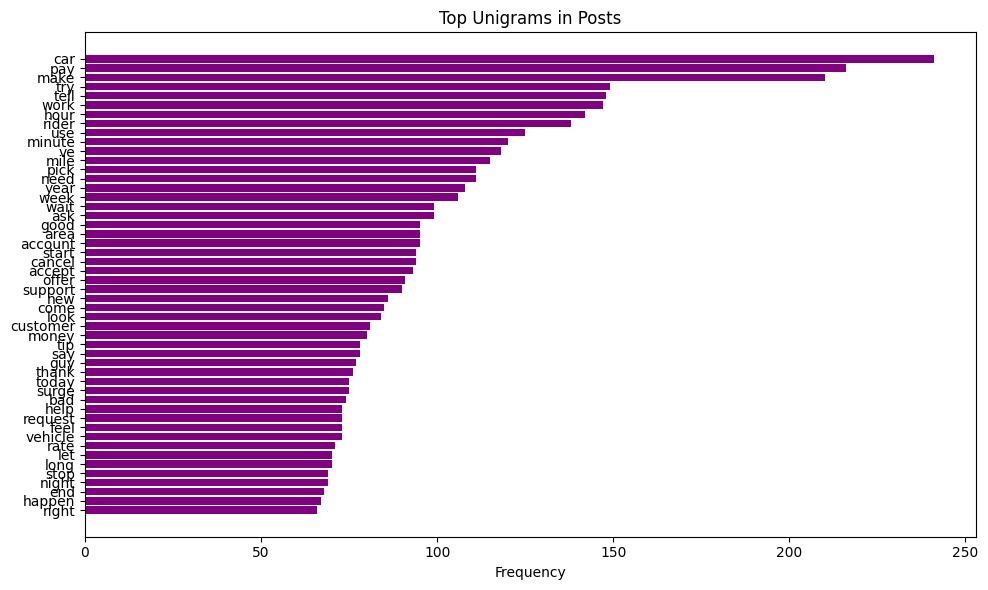

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(df_unigrams['term'].iloc[::-1], df_unigrams['frequency'].iloc[::-1], color='purple')
plt.xlabel("Frequency")
plt.title("Top Unigrams in Posts")
plt.tight_layout()
plt.show()


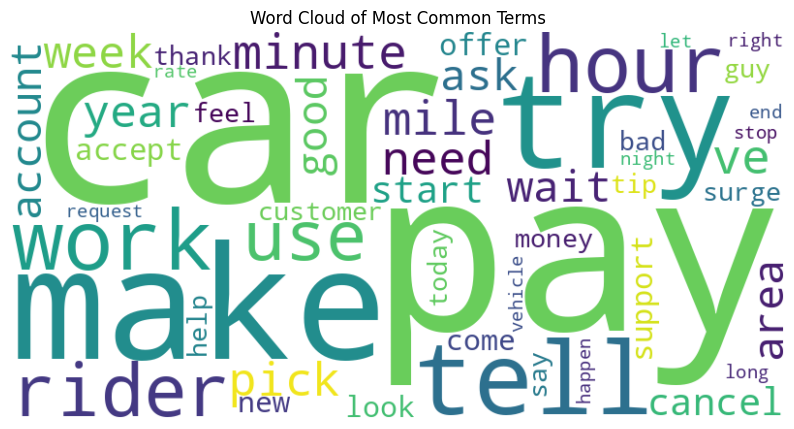

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(zip(words, word_freq)))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Most Common Terms")
plt.show()


In [ ]:
all_posts_df

,id,title,selftext,author,score,created_utc,num_comments,cleaned_title,cleaned_selftext,vader_neg,vader_neu,vader_pos,vader_compound,vader_sentiment
0,1k6ri58,Simple Question About Hertz,Do they allow you to rent with my only a debit...,SpringTop8166,3,2025-04-24 12:55:33,2,simple question hertz,allow rent debit card cc secure put money reme...,0.098,0.700,0.202,0.4019,positive
1,1k6l2y3,Matching to trips observation,Recently I've noticed that if I get a request ...,pakirby123,1,2025-04-24 06:02:05,0,match observation,recently notice request go queue stop light st...,0.273,0.630,0.097,-0.4939,negative
2,1k6l3mm,Its becoming a joke,The algorithm is so corrupt it knows how to ma...,left-hand357,2,2025-04-24 06:03:14,0,become joke,algorithm corrupt know make worth getting pay ...,0.161,0.627,0.212,0.8996,positive
3,1k6qo14,Wrong background check,I got a notice the other day that my driving p...,MidnightAcceptable44,4,2025-04-24 12:13:51,1,wrong background check,notice privilege suspend background check thre...,0.143,0.649,0.209,0.5053,positive
4,1k6q1dm,New opportunities,What are some other recommendations of freelan...,Wingss013,2,2025-04-24 11:39:32,1,new opportunity,recommendation freelance job flexible uberlyft...,0.105,0.497,0.398,0.5999,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,1jwj32n,Did I pay the correct amount?,"Hey Guys, so I’m from Hawaii I paid roughly 10...",More_Permission_4347,1,2025-04-11 06:10:15,10,pay correct amount,hey guy I m hawaii pay roughly 10k federal est...,0.111,0.791,0.099,0.1779,positive
821,1k6segm,i got to quit uber!!!!,i was driving uber and lyft and got another jo...,--R0N--,4,2025-04-24 13:36:51,0,quit,another job hate customer treat u shit low hop...,0.337,0.358,0.305,-0.2263,negative
822,1k6ry6e,Can you be a helper?,Guys I am doing my university graduation proje...,--R0N--,2,2025-04-24 13:16:25,3,helper,guys university graduation project need interv...,0.000,0.870,0.130,0.4019,positive
823,1k6sbjt,Customers canceling rides.,"I mostly drive UberEats, I don’t like interact...",--R0N--,1,2025-04-24 13:33:18,0,customer cancel,mostly ubereat do not interact stranger try ma...,0.104,0.655,0.241,0.9536,positive
